In [1]:
%matplotlib inline
import pandas as pd
import km3pipe.style.moritz
import matplotlib.pyplot as plt

Loading style definitions from '/home/moritz/pkg/km3pipe/km3pipe/kp-data/stylelib/moritz.mplstyle'


In [2]:
from km3flux.flux import DarkMatterFlux
DarkMatterFlux.channels

{'b', 'mu', 'tau', 'w'}

In [3]:
#prod_numu_fname = 'AtProductionNoEW_neutrinos_mu.dat'     # with the EW correction
prod_numu_fname = 'AtProduction_neutrinos_mu.dat'

nue_fname = 'GC_neutrinos_e.dat'
numu_fname = 'GC_neutrinos_mu.dat'
nutau_fname = 'GC_neutrinos_tau.dat'

In [4]:
prod = pd.read_table(prod_numu_fname, delim_whitespace=True)

nue = pd.read_table(nue_fname, delim_whitespace=True)
numu = pd.read_table(numu_fname, delim_whitespace=True)
nutau = pd.read_table(nutau_fname, delim_whitespace=True)

In [5]:
nue['flavor'] = 'nu_e'
numu['flavor'] = 'nu_mu'
nutau['flavor'] = 'nu_tau'
df = pd.concat([nue, numu, nutau])

In [6]:
all_cols = sorted(df.columns)
cols = ['mDM', 'Log[10,x]', 
        '\[Mu]', '\[Tau]', 'b', 'W',
        'flavor'
       ]
alias = {
    'mDM': 'mass_dm',
    'Log[10,x]': 'log10_x',
    '\[Mu]': 'mu',
    '\[Tau]': 'tau',
    'W': 'w',
}

In [7]:
df = df[cols]
df.rename(columns=alias, inplace=True)
prod = prod[[c for c in cols if c != 'flavor']]
prod.rename(columns=alias, inplace=True)

In [8]:
df.columns

Index(['mass_dm', 'log10_x', 'mu', 'tau', 'b', 'w', 'flavor'], dtype='object')

In [9]:
prod.columns

Index(['mass_dm', 'log10_x', 'mu', 'tau', 'b', 'w'], dtype='object')

In [10]:
tabs = {mass: tab
    for mass, tab in df.groupby('mass_dm')}

In [11]:
masses = sorted(list(tabs.keys()))
masses[:5]

[5, 6, 8, 10, 15]

In [12]:
m3k = tabs[3000]
m3k = m3k[m3k.flavor == 'nu_mu']

p = prod[prod.mass_dm == 3000]

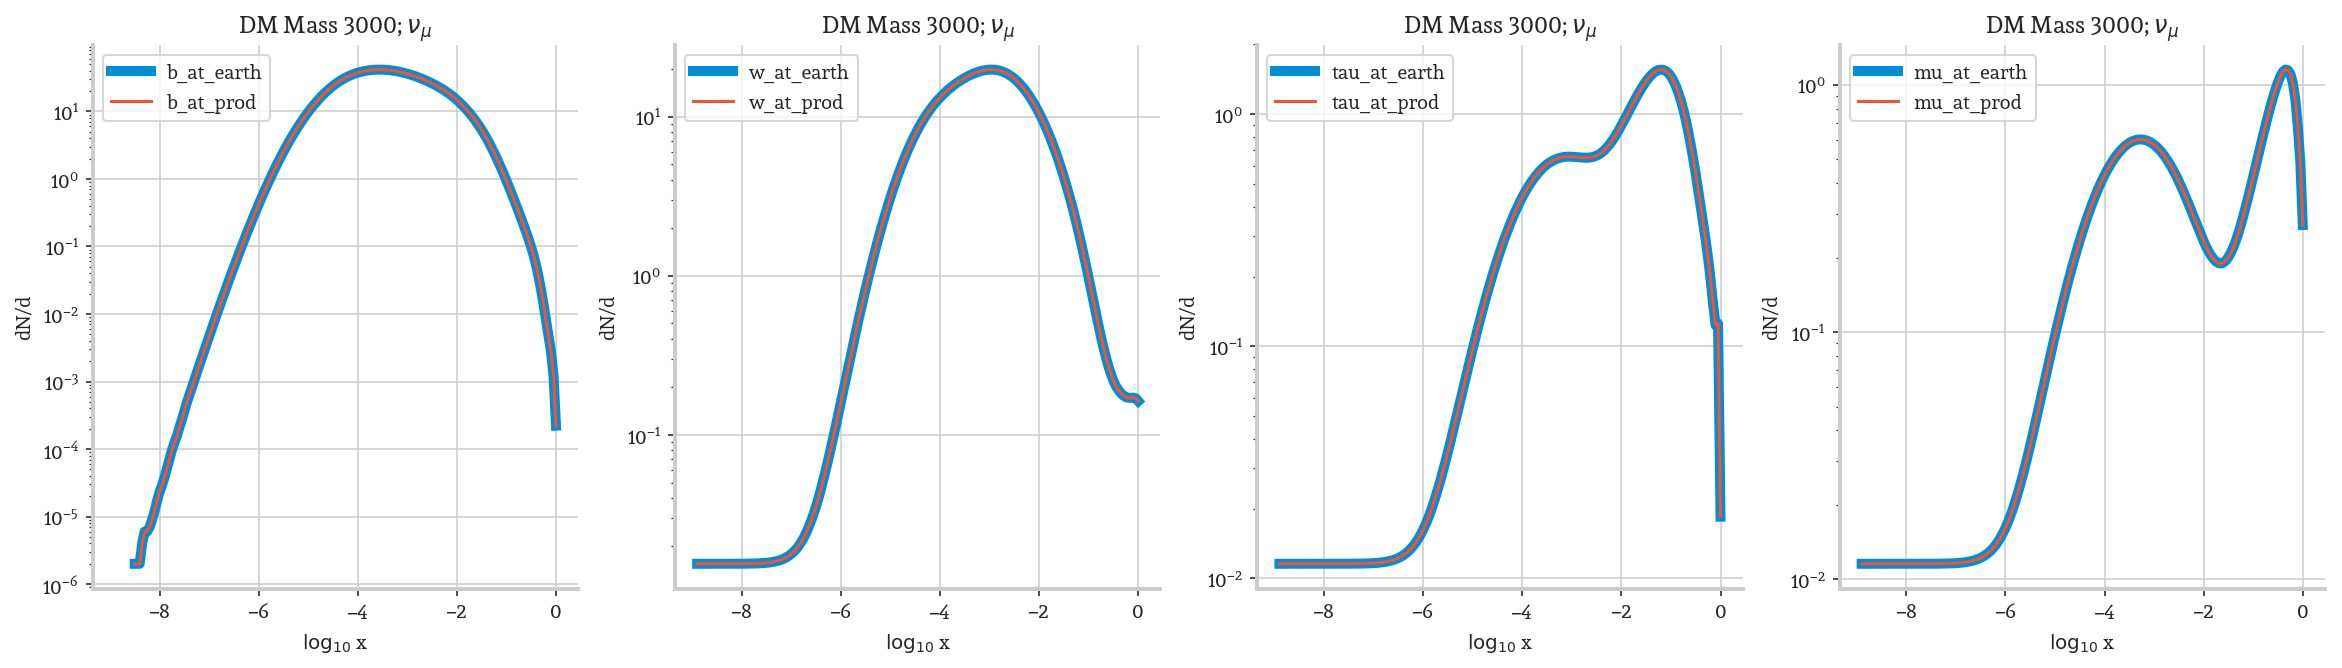

In [23]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))

m3k.plot('log10_x', 'b', label='b_at_earth', ax=ax1, linewidth=5)
p.plot('log10_x', 'b', label='b_at_prod', ax=ax1)
ax1.legend()
ax1.set_title(r'DM Mass 3000; $\nu_\mu$')
ax1.set_xlabel(r'$\log_{10}$ x')
ax1.set_ylabel('dN/d')
ax1.set_yscale('log');

ax = m3k.plot('log10_x', 'w', label='w_at_earth', ax=ax2, linewidth=5)
p.plot('log10_x', 'w', label='w_at_prod', ax=ax2)
ax2.legend()
ax2.set_title(r'DM Mass 3000; $\nu_\mu$')
ax2.set_xlabel(r'$\log_{10}$ x')
ax2.set_ylabel('dN/d')
ax2.set_yscale('log');

ax = m3k.plot('log10_x', 'tau', label='tau_at_earth', ax=ax3, linewidth=5)
p.plot('log10_x', 'tau', label='tau_at_prod', ax=ax3)
ax3.legend()
ax3.set_title(r'DM Mass 3000; $\nu_\mu$')
ax3.set_xlabel(r'$\log_{10}$ x')
ax3.set_ylabel('dN/d')
ax3.set_yscale('log');

ax = m3k.plot('log10_x', 'mu', label='mu_at_earth', ax=ax4, linewidth=5)
p.plot('log10_x', 'mu', label='mu_at_prod', ax=ax4)
ax4.legend()
ax4.set_title(r'DM Mass 3000; $\nu_\mu$')
ax4.set_xlabel(r'$\log_{10}$ x')
ax4.set_ylabel('dN/d')
ax4.set_yscale('log');